# Задание
**Цель:** Изучить методы отбора признаков для эффективного обучения моделей машинного обучения.

**Описание задания:**

В домашнем задании нужно решить задачу классификации точек наиболее эффективно. Для этого в работе необходимо применить различные методы по отбору признаков. Отбор признаков предпочтительнее осуществлять основываясь на математическом аппарате, поэтому данные для этого задания будут сгенерированы, чтобы избежать признаков с физическим смыслом.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, SelectFromModel, SequentialFeatureSelector

import warnings
warnings.filterwarnings('ignore')

# 1. Сгенерируйте данные с помощью кода:
from sklearn.datasets import make_classification

x_data_generated, y_data_generated = make_classification(scale=1)

In [2]:
X, y = make_classification(scale=1, random_state=14)
X.shape, y.shape

((100, 20), (100,))

In [3]:
X = pd.DataFrame(X, columns=[f'X{i+1}' for i in range(X.shape[1])])
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
0,-0.035212,1.795154,1.043339,-1.126458,0.112470,0.265049,1.921453,-1.176127,1.483589,-1.607204,0.362242,0.846855,-0.439758,-1.523505,-1.399950,1.219781,-1.127363,-0.288613,-1.038128,-0.145382
1,0.669969,0.158761,-1.492554,-0.623444,-0.946602,0.353048,0.408198,1.127350,-0.597064,-0.900004,-1.293580,-1.532696,0.736683,-0.668068,0.522404,-0.149979,-0.505500,1.908817,-0.559690,1.850098
2,0.666877,-1.067308,-0.718580,-0.713813,-1.136332,-0.983779,-2.837333,0.903595,0.728328,0.539421,-1.027604,1.186172,-1.091201,2.149843,-1.099883,0.955521,-0.614724,-0.610448,-0.645331,1.300849
3,-0.215310,-1.007644,0.772872,0.003689,1.195879,1.770591,-1.793619,0.951492,-0.189164,0.628300,-1.484521,-1.139307,0.789969,-1.343026,-1.079787,-0.026965,0.121286,0.011626,0.018160,-1.596259
4,0.570209,0.330494,0.727026,-1.927271,-0.253659,0.686096,1.914779,-1.313104,1.155000,0.130418,-0.495183,0.553157,0.453023,-0.903731,-0.495261,-1.265059,-1.840430,-0.212035,-1.765052,0.557076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.727502,-0.188548,0.708460,-1.477739,0.564678,0.929906,-0.504496,0.934066,0.007927,0.576425,-0.763955,-0.047284,-0.030518,-0.225439,-0.298799,-1.299148,-1.380690,-0.847963,-1.349533,-0.464838
96,-0.394013,0.893765,-0.092400,2.390216,0.211929,0.631516,0.915709,-1.226711,1.873883,-0.450869,-0.627183,0.963977,-0.579250,0.033993,0.399481,-1.656330,2.380922,-1.532418,2.201382,-0.469772
97,0.662134,-2.408088,-2.358663,-0.736378,-0.343972,1.236720,0.959749,0.440589,-1.156706,0.582032,1.200679,-1.916246,-0.324044,-0.004362,0.367984,-0.759910,-0.813382,-0.395007,-0.688227,0.118041
98,0.597740,1.585419,-0.401502,0.291447,1.683047,-0.327016,-1.089136,-0.290820,-1.175393,1.521465,-1.079325,-1.704506,0.907864,1.078476,-0.101577,1.683246,0.369817,-0.464877,0.278401,-1.336544


In [4]:
df = X.copy()
df['target'] = y

# 2. Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:
cross_val_score(LogisticRegression(), x, y, scoring=‘accuracy’).mean()

In [5]:
def scoring(X, y, solver='liblinear', penalty='l2', rnd=14):
    '''Кросс-валидация с использованием модели логистической регрессии'''
    return cross_val_score(LogisticRegression(random_state=rnd, n_jobs=-1, solver=solver, penalty=penalty), X, y,
                               scoring='accuracy', n_jobs=-1).mean()

In [6]:
baseline_score = scoring(X, y)
baseline_score

0.7100000000000001

# 3. Используйте статистические методы для отбора признаков:
    a) Выберите признаки на основе матрицы корреляции.
    b) Отсеките низковариативные признаки (VarianceThreshold).
    c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.

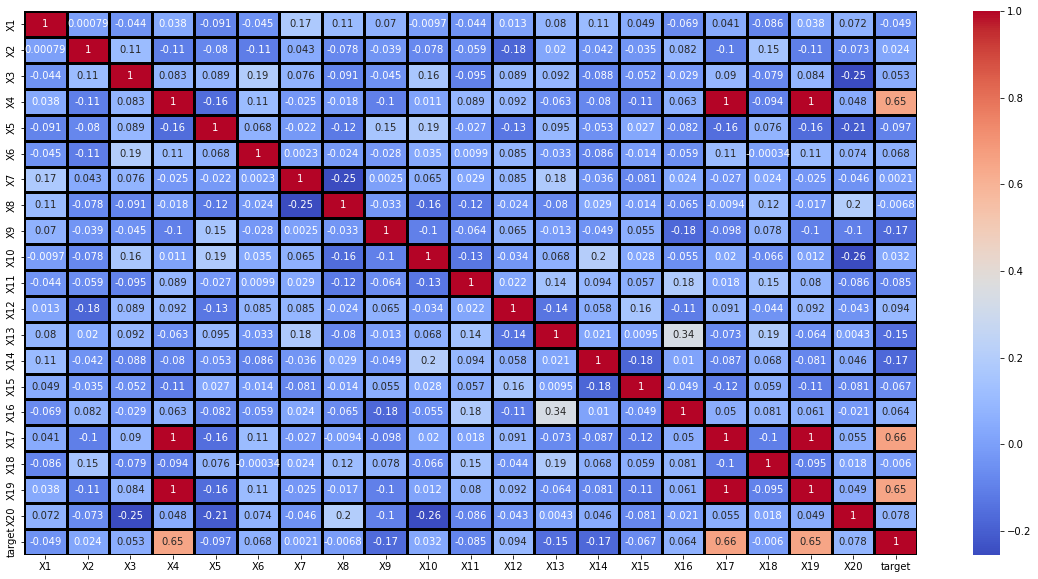

In [7]:
plt.figure(figsize=[20,10])

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=3, linecolor='black')

plt.show()

In [8]:
corr_matrix_features = ['X4', 'X17', 'X19']
corr_matrix_score = scoring(df[corr_matrix_features], df['target'])
corr_matrix_score

0.8099999999999999

После удаления столбцов с очень низкой корреляцией с целевой переменной метрика ощутимо выросла.

In [9]:
thresholds = np.arange(0.0, 1.52, 0.01)
variance_threshold_score = baseline_score
threshold = None

for thr in thresholds: # перебираем значения thresholds
    selector = VarianceThreshold(thr)
    X_tmp = selector.fit_transform(X)
    sc = scoring( X_tmp, y)
    
    # если accuracy в данной итерации больше максимальной - заменяем значения variance_threshold_score,threshold и vth_features
    if sc > variance_threshold_score: 
        variance_threshold_score = sc # accuracy
        threshold = thr # threshold
        vth_features = selector.get_feature_names_out() # features
threshold, variance_threshold_score, list(vth_features)

(1.09,
 0.8400000000000001,
 ['X2', 'X3', 'X4', 'X5', 'X10', 'X11', 'X16', 'X17', 'X18', 'X19'])

Максимальная метрика получается при использовании признаков 'X2', 'X3', 'X4', 'X5', 'X10', 'X11', 'X16', 'X17', 'X18', 'X19'.

# 4. Осуществите отбор признаков на основе дисперсионного анализа:

a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif ([SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)(f_classif, k=5)).

b) Повторите п. 2 на отобранных признаках.

In [10]:
selector = SelectKBest(f_classif, k=5)
X_tmp = selector.fit_transform(X, y)
kbest_score = scoring(X_tmp, y)
kbest_features =  selector.get_feature_names_out()
kbest_score, list(kbest_features)

(0.8100000000000002, ['X4', 'X9', 'X14', 'X17', 'X19'])

# 5. Отбор с использованием моделей:

a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию ([SelectFromModel](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html)). Используйте L1 регуляризацию.

b) Реализуйте отбор признаков с помощью модели [RandomForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) и встроенного атрибута feature_impotance.

c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.

In [11]:
model = LogisticRegression(random_state=42, solver='liblinear', penalty='l1').fit(X, y)
selector = SelectFromModel(estimator=model).fit(X, y)
X_tmp = selector.transform(X)
sfm_score = scoring(X_tmp, y, penalty='l1')
sfm_features = selector.get_feature_names_out()
sfm_score, list(sfm_features)

(0.77,
 ['X1',
  'X2',
  'X5',
  'X7',
  'X8',
  'X9',
  'X10',
  'X11',
  'X12',
  'X13',
  'X14',
  'X16',
  'X17',
  'X18',
  'X20'])

In [12]:
model = RandomForestClassifier(random_state=42).fit(X, y)
imps = pd.Series(model.feature_importances_, index=X.columns.to_list())
rf_features = imps.sort_values(ascending=False).head(4).index.to_list()
rf_features

['X17', 'X4', 'X19', 'X11']

In [13]:
rf_score = scoring(X[rf_features], y)
rf_score

0.8400000000000001

# 6. Перебор признаков:

a) [SequentialFeatureSelector](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html).

b) Повторите п. 2 на отобранных признаках.

In [17]:
def scoring_sfs_estimators(X, y, estimators, logs=False):
    '''Функция перебирает estimators и число признаков и подбирает максимальное значение accuracy'''
    sfs_score = 0

    for estimator in estimators:
        for n_feature in range(1, X.shape[1]):
            selector = SequentialFeatureSelector(estimator=estimator, n_features_to_select=n_feature, n_jobs=-1)
            X_tmp = selector.fit_transform(X, y)
            tmp_score = scoring(X_tmp, y)
            if logs: # логи
                print(estimator, n_feature, tmp_score)
            if tmp_score > sfs_score: # замена значений, при большем accuracy
                sfs_score = tmp_score
                best_est = estimator
                n_features = n_feature
                sfs_features =  selector.get_feature_names_out()
    print(f'{best_est}, n_features={n_features} - score {sfs_score}') # вывод лучшего результата
    
    return sfs_score, sfs_features # возвращает accuracy и features

In [18]:
%%time
estimators = [
            LogisticRegression(random_state=42, n_jobs=-1), # логистическая регрессия
            KNeighborsClassifier(n_neighbors=3, n_jobs=-1), # KNN
            BaggingClassifier(KNeighborsClassifier(n_neighbors=3, n_jobs=-1), # Bagging с KNN
                                max_samples=0.5, max_features=0.5, random_state=42, n_jobs=-1),
            RandomForestClassifier(random_state=42, n_jobs=-1), # Случайный лес
            GradientBoostingClassifier(random_state=42) # Градиентный бустинг
            ]
sfs_score, sfs_features = scoring_sfs_estimators(X, y, estimators=estimators)
sfs_score, list(sfs_features)

LogisticRegression(n_jobs=-1, random_state=42), n_features=6 - score 0.8800000000000001
CPU times: total: 1min 39s
Wall time: 17min 47s


(0.8800000000000001, ['X2', 'X6', 'X11', 'X12', 'X17', 'X18'])

# 7. Сформулируйте выводы по проделанной работе:

a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.

In [19]:
selection_method = ['baseline', 'correlation_matrix', 'VarianceThreshold', 'SelectKBest',
                    'SelectFromModel', 'RandomForest', 'SequentialFeatureSelector']
features = [list(X.columns), corr_matrix_features, vth_features, kbest_features, sfm_features, rf_features, sfs_features]
score = [baseline_score, corr_matrix_score, variance_threshold_score, kbest_score, sfm_score, rf_score, sfs_score]

In [21]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame({
    'selection_method': selection_method,
    'features': features,
    'avg_accuracy': score
})

,selection_method,features,avg_accuracy
0,baseline,"[X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20]",0.71
1,correlation_matrix,"[X4, X17, X19]",0.81
2,VarianceThreshold,"[X2, X3, X4, X5, X10, X11, X16, X17, X18, X19]",0.84
3,SelectKBest,"[X4, X9, X14, X17, X19]",0.81
4,SelectFromModel,"[X1, X2, X5, X7, X8, X9, X10, X11, X12, X13, X14, X16, X17, X18, X20]",0.77
5,RandomForest,"[X17, X4, X19, X11]",0.84
6,SequentialFeatureSelector,"[X2, X6, X11, X12, X17, X18]",0.88


Наилучший результат получился при использовании SequentialFeatureSelector в сочетании с логистической регрессией.